In [1]:
import pandas as pd
import numpy as np
import re
import re as sub
import seaborn as sns
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,confusion_matrix, classification_report
import matplotlib.pyplot as plt

In [78]:

try:
    with open('corpus_all.txt', 'r', encoding='utf-8') as file:
        lines = []  # Empty list to store the lines
        for line in file:
            lines.append(line.strip())  # Append the line to the list, removing any leading/trailing whitespace
    
    with open('stopwords-bn.txt', 'r', encoding='utf-8') as test:
        stopwords_bn = test.readlines()
        # the above stopwords contains newline \n
        stop_bn = []

        for word in stopwords_bn:
            stop_bn.append(word.rstrip("\r\n"))
            
except FileNotFoundError:
    print("File not found. Please check the file path and try again.")

#file_path = 'corpus_all.txt'  # Replace with the actual path to your text file
first_words = []  # Empty list to store the first words

try:
    for line in lines:
        words = line.strip().split()  # Split the line into words
        if words:
            first_word = words[0]  # Get the first word
            first_words.append(first_word)  # Append the first word to the list

except FileNotFoundError:
    print("File not found. Please check the file path and try again.")


# Define the status levels
status_levels = ["happy","angry","fear","disgust","sad","surprise",]

# Initialize a list to store the extracted status levels and sentences
extracted_data = []

# Iterate over the texts
for text in lines:
    # Initialize variables to store the extracted status level and sentence
    status = ""
    sentence = ""

    # Iterate over the status levels
    for level in status_levels:
        if level in text:
            # Split the text based on the status level
            split_text = text.split(level, 1)

            # Extract the status level and sentence
            status = level
            sentence = split_text[1].strip()
            break

    # Append the extracted status level and sentence to the list
    extracted_data.append({"Status": status, "Sentence": sentence})
    
df = pd.DataFrame(extracted_data)

In [82]:

def text_pre_processing(text):
    #remove stop words from the text
    text = ' '.join(word for word in text.split() if word not in stop_bn)
    #remove punctuation from the text
    text = re.sub(r'[^\w\s]', '', text)
    #remove numbers from the text
    text = re.sub(r'[0-9]', '', text)
    #remove extra spaces from the text
    text = re.sub(' +', ' ', text)
    return text

df['Sentence'] = df['Sentence'].apply(text_pre_processing)

# Data convert categorical to numerical
df['Status'] = df['Status'].map({'happy': 0, 'angry': 1, 'fear': 2, 'disgust': 3, 'sad': 4, 'surprise': 5})

In [83]:
# show the number of observations for the length of 1st word
df['first_word_length'] = df['Sentence'].str.split().str[0].str.len()

# show the number of words for each observation
df['word_count'] = df['Sentence'].str.split().str.len()

# show the number of characters for each observation
df['char_count'] = df['Sentence'].str.len()

# show the average word length
df['avg_word_length'] = df['char_count'] / df['word_count']

# show the number of stopwords
df['stopwords'] = df['Sentence'].apply(lambda x: len([x for x in x.split() if x in stop_bn]))

# show the number of numerics
df['numerics'] = df['Sentence'].apply(lambda x: len([x for x in x.split() if x.isdigit()]))

df.head()


,Status,Sentence,word_count,char_count,avg_word_length,stopwords,numerics,first_word_length
0,4,বরবর মননয পরধনমনতর গণপরজতনতর বলদশ সরকর মননয পর...,251,1236,4.924303,5,0,4.0
1,4,তদনত লভ তদনতর হয়ছ মন রজনতক শকতর তদনত পরব সমনয ...,32,140,4.375000,0,0,4.0
2,1,দশক মধযম আয়র দশ রপনতর মগর মলকর দশ পরনত হচছ,10,42,4.200000,0,0,3.0
3,0,গরবত মসলম সগরম যদধ চর রণবর আললহ ছর নচ শর নরয় ত...,14,59,4.214286,0,0,4.0
4,1,রতর বল কসর সকল,4,14,3.500000,0,0,3.0


In [84]:
df.drop(['first_word_length'], axis=1, inplace=True)
df.drop(['word_count'], axis=1, inplace=True)
df.drop(['char_count'], axis=1, inplace=True)
df.drop(['avg_word_length'], axis=1, inplace=True)
df.drop(['stopwords'], axis=1, inplace=True)
df.drop(['numerics'], axis=1, inplace=True)


In [85]:
df

,Status,Sentence
0,4,বরবর মননয পরধনমনতর গণপরজতনতর বলদশ সরকর মননয পর...
1,4,তদনত লভ তদনতর হয়ছ মন রজনতক শকতর তদনত পরব সমনয ...
2,1,দশক মধযম আয়র দশ রপনতর মগর মলকর দশ পরনত হচছ
3,0,গরবত মসলম সগরম যদধ চর রণবর আললহ ছর নচ শর নরয় ত...
4,1,রতর বল কসর সকল
...,...,...
6284,5,ভরত পরতদন ১৮ ট রপ কইস এনটর
6285,5,সবধন দশ
6286,4,সবধন দশর নগরক হয় পরধন
6287,1,চদলম দদ পয়স


<Axes: >

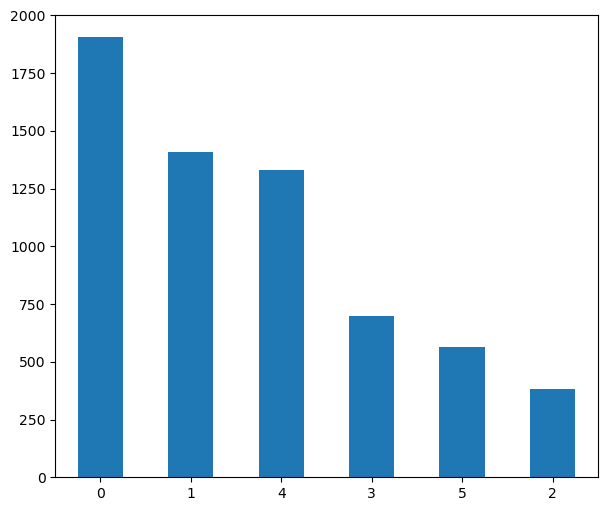

In [51]:
# Plot the distribution of the target variable
df['Status'].value_counts().plot(kind='bar', figsize=(7, 6), rot=0)


In [52]:
# Apply resampling to address class imbalance
from sklearn.utils import resample

# Separate majority and minority classes
df_majority = df[df.Status==0]
df_minority = df[df.Status==1]
df_minority2 = df[df.Status==2]
df_minority3 = df[df.Status==3]
df_minority4 = df[df.Status==4]
df_minority5 = df[df.Status==5]

# Upsample minority class
df_minority_upsampled = resample(df_minority, 
                                    replace=True,     # sample with replacement
                                    n_samples=1000,    # to match majority class
                                    random_state=123) # reproducible results

df_minority2_upsampled = resample(df_minority2,
                                    replace=True,
                                    n_samples=1000,
                                    random_state=123)

df_minority3_upsampled = resample(df_minority3,
                                    replace=True,
                                    n_samples=1000,
                                    random_state=123)

df_minority4_upsampled = resample(df_minority4,
                                    replace=True,
                                    n_samples=1000,
                                    random_state=123)

df_minority5_upsampled = resample(df_minority5,
                                    replace=True,
                                    n_samples=1000,
                                    random_state=123)

# Combine majority class with upsampled minority class
df_upsampled = pd.concat([df_majority, df_minority_upsampled, df_minority2_upsampled, df_minority3_upsampled, df_minority4_upsampled, df_minority5_upsampled])

# Display new class counts
df_upsampled.Status.value_counts()

0    1905
1    1000
2    1000
3    1000
4    1000
5    1000
Name: Status, dtype: int64

<Axes: >

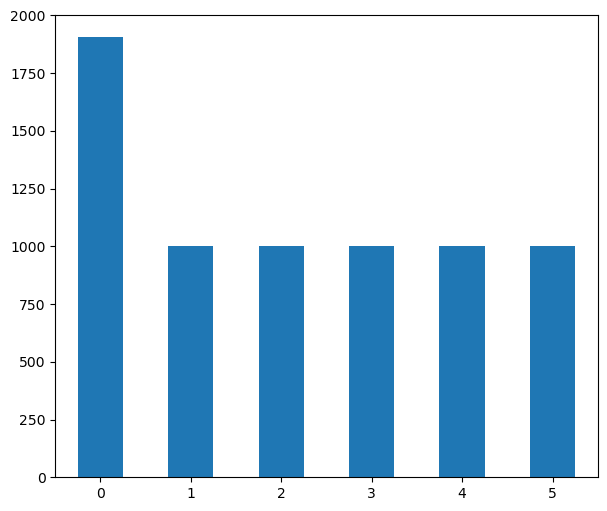

In [53]:
# Plot the distribution of the target variable after resampling 
df_upsampled['Status'].value_counts().plot(kind='bar', figsize=(7, 6), rot=0)

In [94]:
from sklearn.feature_extraction.text import TfidfVectorizer
from imblearn.over_sampling import SMOTE
import numpy as np
import pandas as pd

# Separate input features and target
X = df['Sentence']
y = df['Status']

# Convert labels to numerical values using LabelEncoder
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
y = le.fit_transform(y)

# Vectorize text using TF-IDF
tfidf_vectorizer = TfidfVectorizer()
X_tfidf = tfidf_vectorizer.fit_transform(X)

# Apply SMOTE
smote = SMOTE(sampling_strategy='auto', random_state=42)
X_resampled, y_resampled = smote.fit_resample(X_tfidf, y)

print (X_resampled.shape)
print (y_resampled.shape)


(11430, 13112)
(11430,)


In [95]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42)

# Train a Logistic Regression model
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
lr.fit(X_train, y_train)

# Make predictions using the testing set
y_pred = lr.predict(X_test)

# Evaluate the model performance metrics
print("Accuracy:", accuracy_score(y_test, y_pred))

Accuracy: 0.7077865266841645


c:\ProgramData\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [55]:
import tensorflow as tf
from tensorflow.keras.layers import Dense, Dropout, Input, LSTM, Embedding, concatenate, GlobalMaxPooling1D
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
import numpy as np

In [66]:

# Create a label encoder for target labels
label_encoder = LabelEncoder()
y_train_encoded = label_encoder.fit_transform(y_train)
y_test_encoded = label_encoder.transform(y_test)
num_classes = len(np.unique(y_train_encoded))

# Text data preprocessing
max_sequence_length = 100  # Set your desired sequence length
tokenizer = Tokenizer(num_words=1000)
tokenizer.fit_on_texts(X_train)
X_train_seq = tokenizer.texts_to_sequences(X_train)
X_test_seq = tokenizer.texts_to_sequences(X_test)
X_train_padded = pad_sequences(X_train_seq, padding='post', maxlen=max_sequence_length)
X_test_padded = pad_sequences(X_test_seq, padding='post', maxlen=max_sequence_length)


In [90]:

# GNN part
input_gnn = Input(shape=(X_train_padded.shape[1],))
output_gnn = Dense(128, activation='relu')(input_gnn)
output_gnn = Dropout(0.2)(output_gnn)
output_gnn = Dense(64, activation='relu')(output_gnn)


In [91]:

# LSTM part
input_lstm = Input(shape=(X_train_padded.shape[1],))
output_lstm = Embedding(input_dim=1000, output_dim=128)(input_lstm)
output_lstm = LSTM(64, return_sequences=True)(output_lstm)
output_lstm = GlobalMaxPooling1D()(output_lstm)


In [93]:

# Combine GNN and LSTM outputs
combined = concatenate([output_gnn, output_lstm])
combined = Dense(64, activation='relu')(combined)
combined = Dropout(0.2)(combined)
output_combined = Dense(num_classes, activation='softmax')(combined)

# Create the combined model
model = Model(inputs=[input_gnn, input_lstm], outputs=output_combined)
model.compile(optimizer=Adam(lr=0.001), loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Train the combined model
model.fit([X_resampled, X_resampled], y_resampled, epochs=5, batch_size=32)

# Make predictions
y_pred = np.argmax(model.predict([X_test_padded, X_test_padded]), axis=1)

# Calculate and print accuracy score
accuracy = accuracy_score(y_test_encoded, y_pred)
print('Combined Model Accuracy Score:', accuracy)

InvalidArgumentError: {{function_node __wrapped__SerializeManySparse_device_/job:localhost/replica:0/task:0/device:CPU:0}} indices[1] = [0,5045] is out of order. Many sparse ops require sorted indices.
    Use `tf.sparse.reorder` to create a correctly ordered copy.

 [Op:SerializeManySparse]